Dataset source: https://www.kaggle.com/datasets/everydaycodings/global-news-dataset?select=data.csv

>[Notebook 1: Exploratory Data Analysis of Global News Dataset](#scrollTo=kVnPWN3HJrsv)

>>[Part 1: Look at the Big Picture](#scrollTo=l-343xhoM_5m)

>>>[Research Questions Overview](#scrollTo=vtXW-0WsyDoU)

>>[Part 2: Load Dataset](#scrollTo=rncpuLXcKDBE)

>>[Part 3: Exploratory Data Analysis Profiling Report](#scrollTo=tJDmL5K9j6-J)

>>[Part 4: EDA with Text Data](#scrollTo=rA87CtrdnQ7D)

>>>[Key Differences between Text Data and Numerical Data for Exploratory Data Analysis](#scrollTo=aPTHSQn1x1XO)

>>>[Data Overview](#scrollTo=eqKk1iL2Uc_5)

>>[Data Cleaning and Wrangling](#scrollTo=xEwn_g0djs8W)

>>[Part 2: Exploratory Data Analysis](#scrollTo=0bNUOAdoMFwq)

>>[Part 3: Discover Underlying Patterns in Data and Visualize to Gain Insights](#scrollTo=-MzgMz3mNrBn)



# Notebook 1: Exploratory Data Analysis of Global News Dataset

## Part 1: Look at the Big Picture

### Research Questions Overview

The Research Questions we will explore for this dataset are given in the table below as follows:

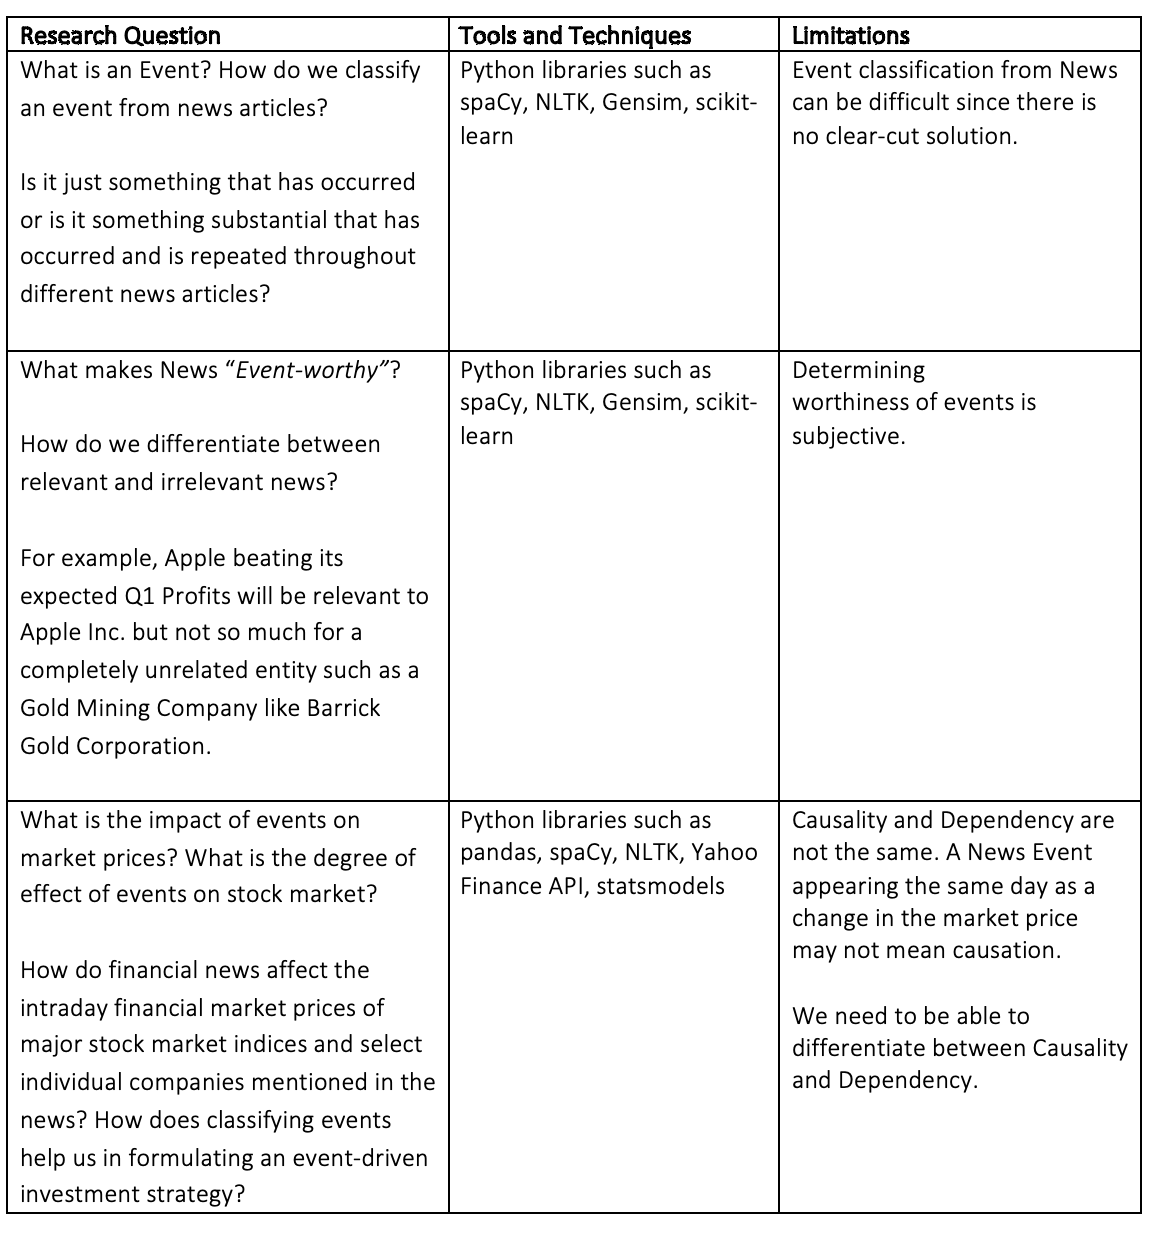

## Part 2: Load Dataset



First and foremost we load the dataset and conduct exploratory data analysis.


This includes:

1.

In [1]:
cd /content/drive/MyDrive/CIND820

/content/drive/MyDrive/CIND820


In [26]:
ls

EDA_profiling_report.html  figures/  global_news/  notebooks/  reports/  scripts/


In [29]:
# install required libraries
!pip install ydata-profiling
!pip install --upgrade Pillow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 12.4 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imageio 2.31.6 requires pillow<10.1.0,>=8.3.2, but you have pillow 10.2.0 which is incompatible.


In [24]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
# load all datasets
data_df = pd.read_csv('global_news/data.csv')
rating_df = pd.read_csv('global_news/rating.csv')
# Converted all datatypes in raw_data.csv to 'object' to standardize datatypes in each column
raw_df = pd.read_csv('global_news/raw-data.csv', dtype='object')

In [14]:
# merge dataframes into master dataframe
master_df = pd.concat([data_df, rating_df, raw_df], axis=0)

In [15]:
master_df.shape

(1096988, 14)

In [16]:
master_df.head()

,article_id,source_id,source_name,author,title,description,url,url_to_image,published_at,content,category,full_content,article,title_sentiment
0,89541,NaN,International Business Times,Paavan MATHEMA,UN Chief Urges World To 'Stop The Madness' Of ...,UN Secretary-General Antonio Guterres urged th...,https://www.ibtimes.com/un-chief-urges-world-s...,https://d.ibtimes.com/en/full/4496078/nepals-g...,2023-10-30 10:12:35.000000,UN Secretary-General Antonio Guterres urged th...,Nepal,UN Secretary-General Antonio Guterres urged th...,NaN,NaN
1,89542,NaN,Prtimes.jp,NaN,RANDEBOOよりワンランク上の大人っぽさが漂うニットとベストが新登場。,[株式会社Ainer]\nRANDEBOO（ランデブー）では2023年7月18日(火)より公...,https://prtimes.jp/main/html/rd/p/000000147.00...,https://prtimes.jp/i/32220/147/ogp/d32220-147-...,2023-10-06 04:40:02.000000,"RANDEBOO2023718()WEB2023 Autumn Winter \n""Nepa...",Nepal,NaN,NaN,NaN
2,89543,NaN,VOA News,webdesk@voanews.com (Agence France-Presse),UN Chief Urges World to 'Stop the Madness' of ...,UN Secretary-General Antonio Guterres urged th...,https://www.voanews.com/a/un-chief-urges-world...,https://gdb.voanews.com/01000000-0a00-0242-60f...,2023-10-30 10:53:30.000000,"Kathmandu, Nepal UN Secretary-General Antonio...",Nepal,NaN,NaN,NaN
3,89545,NaN,The Indian Express,Editorial,Sikkim warning: Hydroelectricity push must be ...,Ecologists caution against the adverse effects...,https://indianexpress.com/article/opinion/edit...,https://images.indianexpress.com/2023/10/edit-...,2023-10-06 01:20:24.000000,At least 14 persons lost their lives and more ...,Nepal,At least 14 persons lost their lives and more ...,NaN,NaN
4,89547,NaN,The Times of Israel,Jacob Magid,"200 foreigners, dual nationals cut down in Ham...","France lost 35 citizens, Thailand 33, US 31, U...",https://www.timesofisrael.com/200-foreigners-d...,https://static.timesofisrael.com/www/uploads/2...,2023-10-27 01:08:34.000000,"Scores of foreign citizens were killed, taken ...",Nepal,NaN,NaN,NaN


## Part 3: Exploratory Data Analysis Profiling Report

Before we do any data cleaning or wrangling let's see what an EDA report looks like:

In [17]:
from ydata_profiling import ProfileReport

In [25]:
# Disclaimer: this profiling report was generated using a sample of 20% of the original dataset since taking the whole dataset crashed
# take a sample of the dataset
sample_df = master_df.sample(frac=0.20)

In [19]:
# generate profiling report
profile_report = ProfileReport(
    sample_df,
    sort=None,
    html={
        "style": {"full_width": True}
    },
    progress_bar=True,
    correlations={
        "auto": {"calculate": True},
        "pearson": {"calculate": False},
        "spearman": {"calculate": False},
        "kendall": {"calculate": False},
        "phi_k": {"calculate": True},
        "cramers": {"calculate": True},
    },
    explorative=True,
    title="Profiling Report"
)

In [28]:
profile_report.to_file("reports/EDA_profiling_report.html")

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:354: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [20]:
profile_report

Output hidden; open in https://colab.research.google.com to view.

From the EDA Profiling Report

above we can observe the following:


*   
*   List item



## Part 4: EDA with Text Data

### Key Differences between Text Data and Numerical Data for Exploratory Data Analysis

Exploratory Data Analysis (EDA) on text data and regular (numeric/tabular) data can differ significantly due to the unique nature of textual information. Here are some key differences:






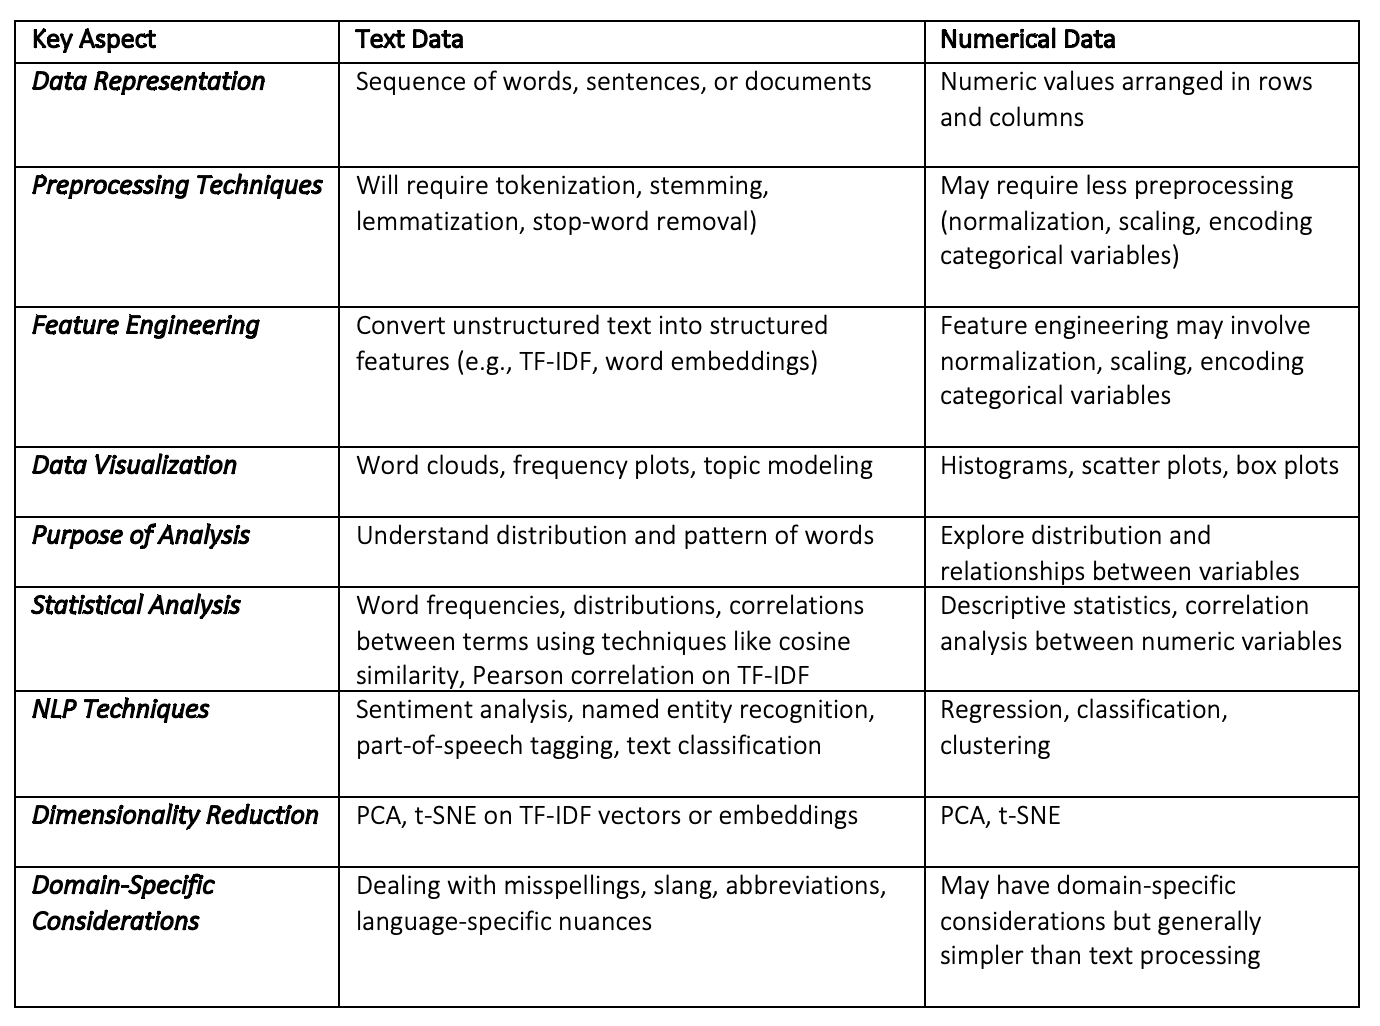

### Data Overview
**Let's divide up the dataset according to the attribute type:**

Textual attributes are:
- source_name
- author
- title
- description
- url
- url_to_image
- content
- category
- full_content
- article
- title_sentiment

Non-textual attributes are:
- article_id
- source_id
- published_at

### Data Cleaning and Wrangling

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('stopwords')

## Data Cleaning and Wrangling

In [19]:
master_df[master_df['category']=='Stock'].head(10)

,article_id,source_id,source_name,author,title,description,url,url_to_image,published_at,content,category,full_content,article,title_sentiment
2404,94333,business-insider,Business Insider,Sponsor Post,Unlocking the future of the web,"From Chipotle to Roblox, web3 is enabling busi...",https://www.businessinsider.com/sc/web3-helps-...,https://i.insider.com/654374023cc84b4dfafa98cb...,2023-11-02 16:25:49.000000,Adobe Stock\nHarnessing customer engagement an...,Stock,NaN,NaN,NaN
2585,94368,NaN,The Indian Express,Reuters,"LinkedIn hits 1 billion members, adds AI featu...",LinkedIn also introduced on Wednesday a button...,https://indianexpress.com/article/technology/s...,https://images.indianexpress.com/2023/11/Linke...,2023-11-02 03:48:44.000000,"LinkedIn, the business-focused social network ...",Stock,"LinkedIn, the business-focused social network ...",NaN,NaN
2747,94370,NaN,Investor's Business Daily,Investor's Business Daily,"Moderna Beats Sales Forecasts, But Light Guida...",The company issued below-consensus sales views...,https://www.investors.com/news/technology/mode...,https://www.investors.com/wp-content/uploads/2...,2023-11-02 10:30:25.000000,Moderna (MRNA) stock could take a hit Thursday...,Stock,NaN,NaN,NaN
3006,94331,abc-news,ABC News,ABC News,WATCH: Man rescued from crashed plane in the E...,A man was hoisted to safety after a small plan...,https://abcnews.go.com/US/video/man-rescued-cr...,https://i.abcnewsfe.com/a/dee71d57-ad91-4eec-8...,2023-11-02 10:19:28.000000,<ul><li>Whats next for Russia? \n</li><li>What...,Stock,NaN,NaN,NaN
3015,94332,abc-news,ABC News,ABC News,WATCH: Teen solves Rubik’s cube while skydiving,"Sam Sieracki, 17, broke the world record by so...",https://abcnews.go.com/GMA/Living/video/teen-s...,https://i.abcnewsfe.com/a/a4f53cb3-cbfe-4f01-a...,2023-11-02 12:16:02.000000,<ul><li>Whats next for Russia? \n</li><li>What...,Stock,NaN,NaN,NaN
3043,94366,NaN,Investor's Business Daily,Investor's Business Daily,Shopify Earnings Top Estimates On Merchant Bus...,SHOP stock climbed after Shopify reported Q3 e...,https://www.investors.com/news/technology/shop...,https://www.investors.com/wp-content/uploads/2...,2023-11-02 11:20:01.000000,Shopify (SHOP) on Thursday reported third quar...,Stock,NaN,NaN,NaN
3071,94410,bbc-news,BBC News,https://www.facebook.com/bbcnews,WeWork to start closing some offices around th...,The BBC understands the firm is to start closi...,https://www.bbc.co.uk/news/business-67291902,https://ichef.bbci.co.uk/news/1024/branded_new...,2023-11-02 00:20:25.000000,The troubled office-sharing firm WeWork is to ...,Stock,The troubled office-sharing firm WeWork is to ...,NaN,NaN
3088,94315,business-insider,Business Insider,Matthew Fox,CHART OF THE DAY: The stock market may have ju...,"If stocks bottomed this week, it would play in...",https://markets.businessinsider.com/news/stock...,https://i.insider.com/65439ddcb788914e554e871b...,2023-11-02 15:32:40.000000,Yardeni Research\n<ul><li>The stock market may...,Stock,NaN,NaN,NaN
3089,94316,business-insider,Business Insider,Jennifer Sor,The stock market is following a rare pattern t...,The stock market is following a rare trend onl...,https://markets.businessinsider.com/news/stock...,https://i.insider.com/650993a9bf943d00195b6b85...,2023-11-02 14:22:37.000000,The stock market is following a rare trend onl...,Stock,NaN,NaN,NaN
3090,94317,business-insider,Business Insider,Matthew Fox,An ideal scenario for the stock market is taki...,"""Productivity boosts real wages, profit margin...",https://markets.businessinsider.com/news/stock...,https://i.insider.com/5f60b7ef323fc4001e0d6323...,2023-11-02 19:08:58.000000,Xinhua/Wang Ying/ Getty Images\n<ul><li>The ec...,Stock,NaN,NaN,NaN


In [21]:
master_df['category'].value_counts()

Stock                                    18580
Health                                   17136
Technology                               16557
News                                     16150
COVID                                    14864
Food                                     14751
Finance                                  14449
Google                                   14347
Home                                     14152
Canada                                   14086
Facebook                                 14073
History                                  13910
world                                    13908
Amazon                                   13848
Games                                    13834
Jobs                                     13818
YouTube                                  13719
Space                                    13652
Education                                13491
Love                                     13490
Asia                                     13474
Sports       

In [20]:
master_df[master_df['category']=='Stock'].shape

(18580, 14)

## Part 2: Exploratory Data Analysis

Check for missing values

In [ ]:
master_df.isnull().sum()

article_id               0
source_id           935194
source_name          65919
author              189829
title                66509
description          69729
url                 129108
url_to_image        193613
published_at        129108
content             129574
category            129553
full_content       1038556
article            1038632
title_sentiment    1038632
dtype: int64

Look at quick overview of dataset

In [ ]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1096988 entries, 0 to 933256
Data columns (total 14 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   article_id       1096988 non-null  object
 1   source_id        161794 non-null   object
 2   source_name      1031069 non-null  object
 3   author           907159 non-null   object
 4   title            1030479 non-null  object
 5   description      1027259 non-null  object
 6   url              967880 non-null   object
 7   url_to_image     903375 non-null   object
 8   published_at     967880 non-null   object
 9   content          967414 non-null   object
 10  category         967435 non-null   object
 11  full_content     58432 non-null    object
 12  article          58356 non-null    object
 13  title_sentiment  58356 non-null    object
dtypes: object(14)
memory usage: 125.5+ MB


Generate EDA report using ydata-profiling

In [ ]:
from ydata_profiling import ProfileReport

profile = ProfileReport(master_df, title="EDA Profiling Report")

In [ ]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
profile.to_file('EDA_report.html')

## Part 3: Discover Underlying Patterns in Data and Visualize to Gain Insights

Major stock market indices:


1. S&P 500: `^GSPC`
2. Dow Jones Industrial Average: `^DJI`
3.

